In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure



# Initializing lattice with 70% positive spins and 70% negative spins

In [2]:

L = 100 
init_random = np.random.random((L,L))
positive_lattice = np.zeros((L,L))
positive_lattice[init_random >=0.3] = 1
positive_lattice[init_random <0.3] = -1
positive_lattice

negative_lattice = np.zeros((L,L))
negative_lattice[init_random >=0.7] = 1
negative_lattice[init_random <0.7] = -1
negative_lattice



array([[-1.,  1.,  1., ...,  1., -1., -1.],
       [-1., -1., -1., ...,  1., -1.,  1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ...,  1., -1., -1.],
       [ 1., -1., -1., ..., -1.,  1.,  1.],
       [ 1., -1.,  1., ...,  1.,  1., -1.]])

In [3]:
def get_energy(lattice):
    kern = generate_binary_structure(2,1)
    kern[1][1] = False 
    arr = -lattice * convolve(lattice,kern,mode ='constant',cval = 0)
    # divide by 2 to avoid double counting
    return arr.sum()/2


In [4]:
get_energy(positive_lattice)

-2994.0

In [5]:
@numba.njit("UniTuple(f8[:], 2)(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, energy): 
    spin_arr = spin_arr.copy()
    spin_sum = np.zeros(times-1)
    energy_sum = np.zeros(times-1)
    
    for t in range(0,times-1): 
        # pick random point on array and flip the spin
        x = np.random.randint(0,L)
        y = np.random.randint(0,L)
        
        spin_i = spin_arr[x,y] 
        spin_f = spin_i* -1 
        
        # compute change in energy
        E_i = 0
        E_f = 0
        
        #Apply boundary conditions as stated in proposal
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<L-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<L-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # Calculate dE 
        dE = E_f-E_i
        
        # Use formula from metropolis algorithm 
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        spin_sum[t] = spin_arr.sum()
        energy_sum[t] = energy
            
    return spin_sum, energy_sum



C:\Users\arham\anaconda3\lib\site-packages\numba\core\decorators.py:253: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


# Results for positive lattive at varying temp

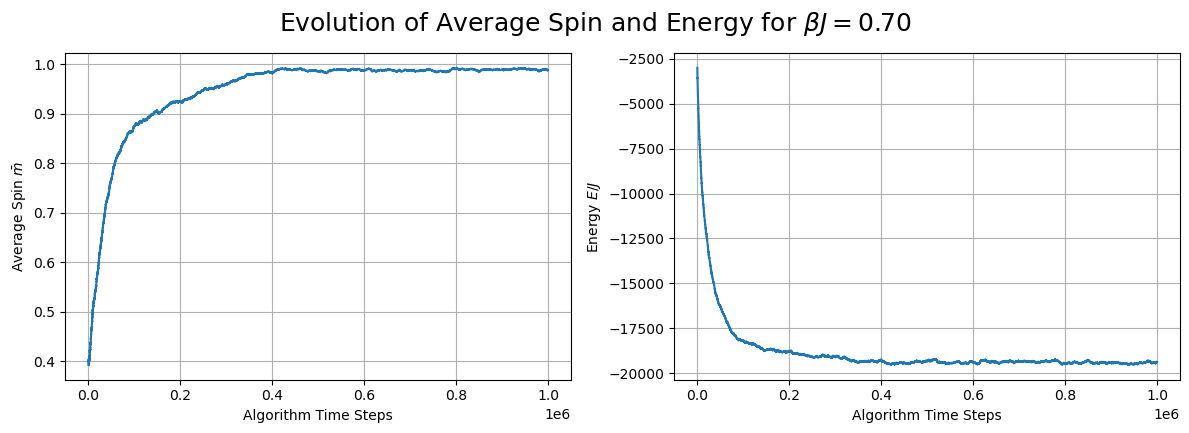

0.989728616
0.0013008189437980983
-194.4199332
0.4639834259300218


In [26]:
spins, energies = metropolis(positive_lattice, 1000000, 0.70, get_energy(positive_lattice))

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/L**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.70', y=1.07, size=18)
plt.show()

m_mean = spins[-100000:].mean()/L**2
m_std = spins[-100000:].std()/L**2
E_mean = energies[-100000:].mean()/L
E_std = energies[-100000:].std()/L

print(m_mean)
print(m_std)
print(E_mean)
print(E_std)


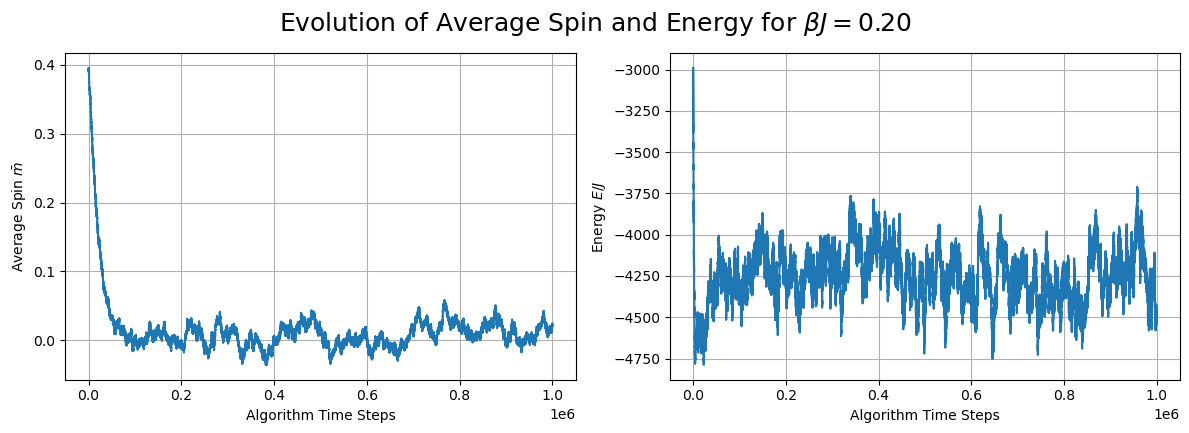

0.008853982
0.011126107492904965
-4201.67108
157.95283464260336


In [7]:
spins, energies = metropolis(positive_lattice, 1000000, 0.20, get_energy(positive_lattice))

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/L**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.20', y=1.07, size=18)
plt.show()

m_mean = spins[-100000:].mean()/L**2
m_std = spins[-100000:].std()/L**2
E_mean = energies[-100000:].mean()
E_std = energies[-100000:].std()

print(m_mean)
print(m_std)
print(E_mean)
print(E_std)


# Results for negative lattice for varying BJ

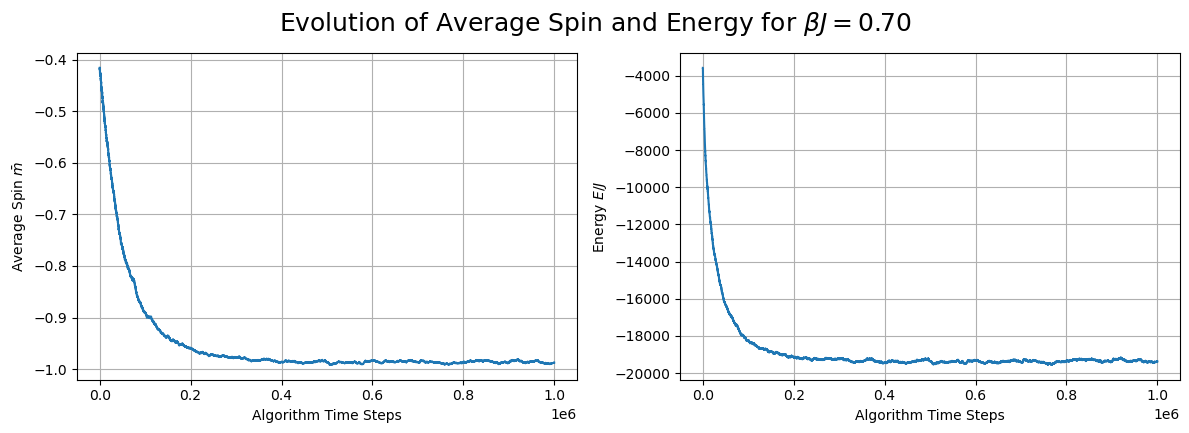

-0.9860226839999999
0.002195040554555656
-19331.18076
65.1592188859136


In [8]:
spins, energies = metropolis(negative_lattice, 1000000, 0.70, get_energy(negative_lattice))

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/L**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.70', y=1.07, size=18)
plt.show()

m_mean = spins[-100000:].mean()/L**2
m_std = spins[-100000:].std()/L**2
E_mean = energies[-100000:].mean()
E_std = energies[-100000:].std()

print(m_mean)
print(m_std)
print(E_mean)
print(E_std)


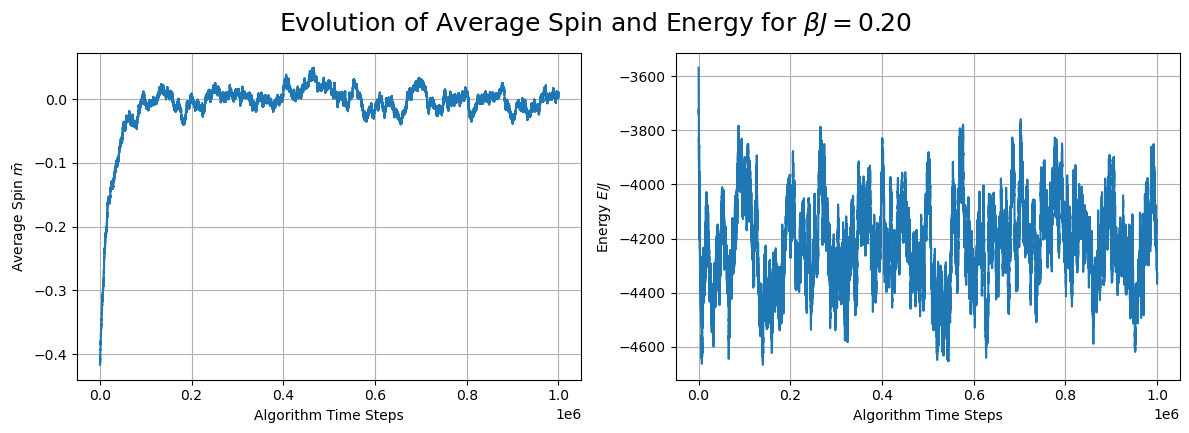

-0.007177307999999999
0.012230252502427577
-4237.09796
144.6335825589562


In [9]:
spins, energies = metropolis(negative_lattice, 1000000, 0.20, get_energy(negative_lattice))

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(spins/L**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta J=$0.20', y=1.07, size=18)
plt.show()

m_mean = spins[-100000:].mean()/L**2
m_std = spins[-100000:].std()/L**2
E_mean = energies[-100000:].mean()
E_std = energies[-100000:].std()

print(m_mean)
print(m_std)
print(E_mean)
print(E_std)


In [18]:
def evolution(lattice, BJ_values):
    m = np.zeros(len(BJ_values))
    E_mean = np.zeros(len(BJ_values))
    E_std = np.zeros(len(BJ_values))
    for i, bj in enumerate(BJ_values):
        # Take the mean of the last 1000000 values
        spins, energies = metropolis(lattice, 1000000, bj, get_energy(lattice))
        m[i] = spins[-100000:].mean()/L**2
        E_mean[i] = energies[-100000:].mean()
        E_std[i] = energies[-100000:].std()
    return m, E_mean, E_std
    
BJs = np.arange(0.1, 2, 0.05)
m_negative, E_mean_negative, E_stds_negative = evolution(negative_lattice, BJs)
                      


In [21]:
m_positive, E_mean_positive, E_stds_positive = evolution(positive_lattice, BJs)


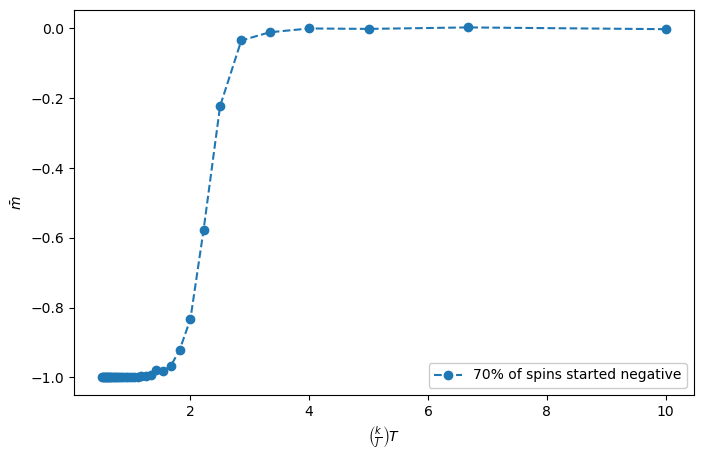

In [24]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, m_negative, 'o--', label='70% of spins started negative')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$\bar{m}$')
plt.legend(facecolor='white', framealpha=1)
plt.show()


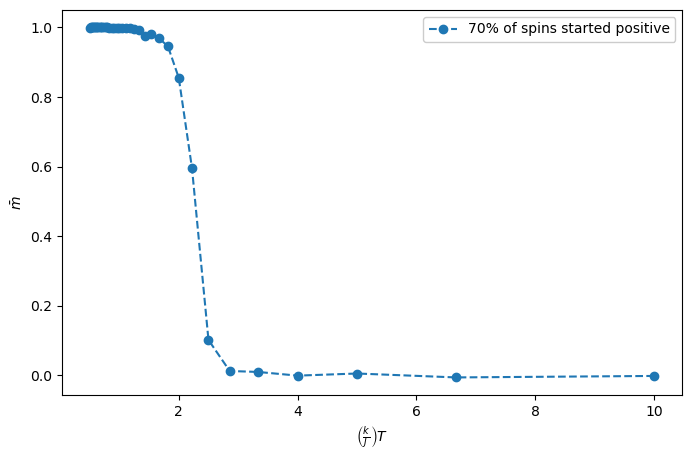

In [25]:
plt.figure(figsize=(8,5))
plt.plot(1/BJs, m_positive, 'o--', label='70% of spins started positive')
plt.xlabel(r'$\left(\frac{k}{J}\right)T$')
plt.ylabel(r'$\bar{m}$')
plt.legend(facecolor='white', framealpha=1)
plt.show()

A lot of the logic is based off of this video: https://www.youtube.com/watch?v=K--1hlv9yv0&t=1412s&ab_channel=Mr.PSolver
